<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Principale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import statsmodels.api as sm
from pandas.plotting import table
#Importing all the packages needed

In [20]:
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
#Load Player stat data set
rs2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2005.csv')
rs2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2006.csv')
rs2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2007.csv')
rs2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2008.csv')
rs2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2009.csv')
rs2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2010.csv')
rs2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2011.csv')
rs2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2012.csv')
rs2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2013.csv')
rs2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2014.csv')
rs2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2015.csv')
rs2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2016.csv')
rs2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2017.csv')
rs2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2018.csv')
rs2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2019.csv')
rs2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2020.csv')
rs2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2021.csv')
rs2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2022.csv')
rs2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2023.csv')
rs2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2024.csv')
rs2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2025.csv')
#Load teams result data sets
st2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2005.csv')
st2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2006.csv')
st2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2007.csv')
st2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2008.csv')
st2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2009.csv')
st2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2010.csv')
st2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2011.csv')
st2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2012.csv')
st2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2013.csv')
st2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2014.csv')
st2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2015.csv')
st2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2016.csv')
st2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2017.csv')
st2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2018.csv')
st2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2019.csv')
st2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2020.csv')
st2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2021.csv')
st2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2022.csv')
st2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2023.csv')
st2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2024.csv')
st2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2025.csv')

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.


In [21]:
#Changing full team name to 3letter code to keep consistent with the rs dataset
team_replacements = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "BRK",
    "NJN":"BRK",
    "Charlotte Hornets": "CHO",
    "Charlotte Bobcats": "CHO",
    "CHA":"CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New Orleans Hornets": "NOP",
    "NOH": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOP",
    "NOK": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Seattle SuperSonics": "OKC",
    "SEA": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

Dropst=['E','Apr','A','C','SE','NW','P','SW','Post','Pre','Oct','Nov','Dec','Jan','Feb','Mar','Jul','Aug','May']
Droprs=['2TM','3TM','TOT','5TM','4TM','nan']
years = range(2005, 2026)

for year in years:
    df_name = f'st{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df=df.drop(columns=Dropst,errors='ignore')
        # Create Win and loss as column and compute %
        df[['W','L']]=df['Overall'].str.split('-',expand=True).astype(int)
        df['W%']=df['W']/(df['L']+df['W'])
        # Save back to variable
        globals()[df_name] = df

#Changing old team name to recent one for consistency
for year in years:
    df_name = f'rs{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df = df[~df.isin(Droprs)]
        df['MVP']=df['Awards'].str.contains('MVP',na=False).astype(int)
        df['ALLNBA']=df['Awards'].str.contains('NBA',na=False).astype(int)
        df['DPOY']=df['Awards'].str.contains('DEF|DPOY',na=False).astype(int)
        # Save back to variable
        globals()[df_name] = df


In [22]:
# --- Exploring Dataframes one by one ---

# 1. Create a dictionnary to associate Dataframes names
# C'est plus propre pour l'affichage que d'utiliser la liste
dfs_dict = {
    "rs2005": rs2005, "rs2006": rs2006, "rs2007": rs2007, "rs2008": rs2008,
    "rs2009": rs2009, "rs2010": rs2010, "rs2011": rs2011, "rs2012": rs2012,
    "rs2013": rs2013, "rs2014": rs2014, "rs2015": rs2015, "rs2016": rs2016,
    "rs2017": rs2017, "rs2018": rs2018, "rs2019": rs2019, "rs2020": rs2020,
    "rs2021": rs2021, "rs2022": rs2022, "rs2023": rs2023, "rs2024": rs2024,
    "rs2025": rs2025
}
sts_dict = {
    "st2005": st2005, "st2006": st2006, "st2007": st2007, "st2008": st2008,
    "st2009": st2009, "st2010": st2010, "st2011": st2011, "st2012": st2012,
    "st2013": st2013, "st2014": st2014, "st2015": st2015, "st2016": st2016,
    "st2017": st2017, "st2018": st2018, "st2019": st2019, "st2020": st2020,
    "st2021": st2021, "st2022": st2022, "st2023": st2023, "st2024": st2024,
    "st2025": st2025
}

#print("--- Starting the analysis of each seasons ---")

# 2. Loop on each pair (name, DataFrame) in the dictionnairy
for name, df in dfs_dict.items():

    #print(f"\n=========================================")
    #print(f" ANALYSIS of : {name}")
    #print(f"=========================================")

    # 1. Display the Shape (Dimensions)
    # df.shape[0] = lignes, df.shape[1] = columns (variables)
    #print(f"Dimensions : {df.shape[0]} lines, {df.shape[1]} variables (columns)")

    # 2. Verify the values NaN
    # .isnull() creates a DF of booleans (True si NaN)
    # .sum() is the sum per column
    # .sum() a second sum for the total sum
    total_nan = df.isnull().sum().sum()

    if total_nan == 0:
       # print(" Good news : No NaN values were found.")
    #else:
        # If there is any NaN values, we want to know where
       # print(f" ATTENTION : {total_nan} NaN Values in total were found !")

        # We create a serie of 'nan_per_column' that count the NaN per column
        nan_per_column = df.isnull().sum()

        # We print only the column that really have NaN
       # print("Infos of NaN per column :")
       # print(nan_per_column[nan_per_column > 0])

    #print("-" * 40)

#print("\n--- End of the analysis ---")



In [23]:
# ---Display to see howw a dataframes looks like from our database. For example 2005
#display(st2005)

In [24]:
rs2006.head(30)

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Awards,Player-additional,MVP,ALLNBA,DPOY
0,1.0,Kobe Bryant,27.0,LAL,SG,80.0,80.0,41.0,12.2,27.2,...,1.8,0.4,3.1,2.9,35.4,MVP-4ASNBA1DEF1,bryanko01,1,1,1
1,2.0,Allen Iverson,30.0,PHI,PG,72.0,72.0,43.1,11.3,25.3,...,1.9,0.1,3.4,1.7,33.0,MVP-10ASNBA3,iversal01,1,1,0
2,3.0,LeBron James,21.0,CLE,SF,79.0,79.0,42.5,11.1,23.1,...,1.6,0.8,3.3,2.3,31.4,MVP-2ASNBA1,jamesle01,1,1,0
3,4.0,Gilbert Arenas,24.0,WAS,PG,80.0,80.0,42.3,9.3,20.9,...,2.0,0.3,3.7,3.6,29.3,ASNBA3,arenagi01,0,1,0
4,5.0,Dwyane Wade,24.0,MIA,SG,75.0,75.0,38.6,9.3,18.8,...,1.9,0.8,3.6,2.9,27.2,MVP-6ASNBA2,wadedw01,1,1,0
5,6.0,Paul Pierce,28.0,BOS,SF,79.0,79.0,39.0,8.7,18.5,...,1.4,0.4,3.5,2.8,26.8,AS,piercpa01,0,0,0
6,7.0,Dirk Nowitzki,27.0,DAL,PF,81.0,81.0,38.1,9.3,19.3,...,0.7,1.0,1.9,2.0,26.6,MVP-3ASNBA1,nowitdi01,1,1,0
7,8.0,Carmelo Anthony,21.0,DEN,SF,80.0,80.0,36.8,9.5,19.7,...,1.1,0.5,2.7,2.9,26.5,NBA3,anthoca01,0,1,0
8,9.0,Michael Redd,26.0,MIL,SG,80.0,80.0,39.1,8.5,19.0,...,1.2,0.1,2.1,2.0,25.4,NaN,reddmi01,0,0,0
9,10.0,Ray Allen,30.0,OKC,SG,78.0,78.0,38.7,8.7,19.2,...,1.3,0.2,2.4,1.9,25.1,AS,allenra02,0,0,0


In [25]:
#---Combine every seasons from 2005 to 2025 to determine score max & score min
#for every variable that are useful in our analysis

# 1. Merge all df in a list
all_dfs_list = [
    rs2005, rs2006, rs2007, rs2008, rs2009, rs2010,
    rs2011, rs2012, rs2013, rs2014, rs2015, rs2016,
    rs2017, rs2018, rs2019, rs2020, rs2021, rs2022,
    rs2023, rs2024, rs2025
]
all_sts_list = [
    st2005, st2006, st2007, st2008, st2009, st2010,
    st2011, st2012, st2013, st2014, st2015, st2016,
    st2017, st2018, st2019, st2020, st2021, st2022,
    st2023, st2024, st2025
]

#We concat all in one big Dataframe
#and we add 'season' column
season = 2005
for df in all_dfs_list:
  df['Season'] = season
  season += 1

season = 2005
for df in all_sts_list:
  df['Season'] = season
  season += 1

sts_data_full = pd.concat(all_sts_list, ignore_index=True)
sts_data_full=sts_data_full.drop(columns=Dropst,errors='ignore')
nbas_data_full = pd.concat(all_dfs_list, ignore_index=True)
nbas_data_full=nbas_data_full[~nbas_data_full.isin(Droprs)]


#print("All seasons combined")
##print(nbas_data_full.shape)
#display(sts_data_full.tail(50))

In [26]:
# Remove the row where 'Rk' is 'League Average'
nbas_data_full = nbas_data_full[nbas_data_full['Rk'] != 'League Average'].copy()

# List of columns that should be numerical (excluding Player, Team, Pos, Awards, Player-additional)
numerical_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Convert numerical columns to numeric, coercing errors to NaN
for col in numerical_cols:
    nbas_data_full[col] = pd.to_numeric(nbas_data_full[col], errors='coerce')

# Drop rows with NaN values in the numerical columns
nbas_data_full.dropna(subset=numerical_cols, inplace=True)

#print("DataFrame after removing rows with missing or non-numerical values in specified columns:")
#print(nbas_data_full.shape)
#display(nbas_data_full.head())

In [27]:
# Check for missing values in the combined DataFrame
missing_values = nbas_data_full.isnull().sum()

# Display the number of missing values per column
#print("Missing values per column in nbas_data_full:")
#display(missing_values[missing_values > 0])

In [28]:
#Iniating True Shooting percentage TS% to measure a team efficiency
nbas_data_full['TS%']=nbas_data_full['PTS']/(2*(nbas_data_full['FGA']+0.44*nbas_data_full['FTA']))
#Creating stats "Per 36 minutes"
# We need to normalize the time played per player
min_played_col='MP'
stats_to_normalize = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', # Positive Stats
    'TOV', 'PF' # Negative Stats
]

#print(f"Normalisation using'{min_played_col}")
for stat in stats_to_normalize:
    new_col_name = f"{stat}_per_36"

    #For every stats, the formule is : (stat / time played) * 36
    # To avoid a zero division we have to use .replace(0,1)
    nbas_data_full[new_col_name] = (nbas_data_full[stat] / nbas_data_full[min_played_col].replace(0, 1)) * 36
#print("Stats 'per 36 minutes' créées.")
#print(nbas_data_full[['Player','Season', min_played_col, 'PTS', 'PTS_per_36','TS%']].head())

In [29]:
# ---3. Agregate effeciency stats---
# we take new named columns
stats_eff = [f"{stat}_per_36" for stat in stats_to_normalize]

# We group by season & teams & we calculate the mean of stats_eff
team_stats_eff = nbas_data_full.groupby(['Season', 'Team'])[stats_eff].mean().reset_index()

#print("\nEffeciency mean stats per team per season:")
#display(team_stats_eff.head())


In [30]:
#First Approach using an arbitrary score
from numpy import positive
# --- 4. Power Score Calculation ---
team_scores = team_stats_eff[['Season', 'Team']].copy()

# Separate positive stats frome the negative ones
positive_stats = ['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36']
negative_stats = ['TOV_per_36', 'PF_per_36']

#For positive stats
for col in positive_stats:
    min_score = team_stats_eff[col].min()
    max_score = team_stats_eff[col].max()
    col_score_name = f"{col}_score"
    team_scores[col_score_name] = 1 + 5 * (team_stats_eff[col] - min_score) / (max_score - min_score)


# For negative stats
for col in negative_stats:
    min_score = team_stats_eff[col].min()
    max_score = team_stats_eff[col].max()
    col_score_name = f"{col}_score"
    team_scores[col_score_name] = 1 + 5 * (max_score - team_stats_eff[col]) / (max_score - min_score)


# Calculate the general mean score
col_score = [col for col in team_scores.columns if col.endswith('_score')]
team_scores['Final_Power_Score'] = team_scores[col_score].mean(axis=1)
team_scores['Final_Power_Score']=(team_scores['Final_Power_Score'])/team_scores['Final_Power_Score'].max()

# Finding the predictible winners from our model
idx_predicts = team_scores.groupby('Season')['Final_Power_Score'].idxmax()

pred_winner = team_scores.loc[idx_predicts]
#Actual winner of a season
idx_winner= sts_data_full.groupby('Season')['W%'].idxmax()
idx_winner = idx_winner.dropna()
idx_winner=idx_winner.drop(columns=Dropst,errors='ignore')
actual_winner=sts_data_full.loc[idx_winner]
#Merging relevant columns to make easier comparaison
pred1=pred_winner[['Season','Team','Final_Power_Score']]
actual1=actual_winner[['Team','W%']]
actual1=actual1.rename(columns={'W%':'Win% of actual winner'})
#Adding actual rank
pred1 = pred1.merge(sts_data_full[['Season','Team','Rk']],
                  on=['Season','Team'],
                  how='left')


pred1 = pred1.rename(columns={'Rk_y': 'Actual Rank'})


Comparaison=pd.concat([pred1.reset_index(drop=True),actual1.reset_index(drop=True)],axis=1)
Comparaison=Comparaison.rename(columns={'Rk': 'Actual Rank'})

print("\n Winners based on our model vs actual winners:")
print(Comparaison)



 Winners based on our model vs actual winners:
    Season Team  Final_Power_Score  Actual Rank Team  Win% of actual winner
0     2005  SAC           0.790386            8  PHO               0.756098
1     2006  PHO           0.881307            4  DET               0.780488
2     2007  DET           0.772769            4  DAL               0.817073
3     2008  LAL           0.806611            3  BOS               0.804878
4     2009  DET           0.823724           17  CLE               0.804878
5     2010  SAS           0.780098           12  CLE               0.743902
6     2011  HOU           0.796630           14  CHI               0.756098
7     2012  GSW           0.808831           23  CHI               0.757576
8     2013  DEN           0.830614            4  MIA               0.804878
9     2014  LAL           0.811148           25  SAS               0.756098
10    2015  GSW           0.885033            1  GSW               0.817073
11    2016  GSW           0.863746      

In [31]:

#Second approach using regression
reg_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%','MVP','ALLNBA','DPOY']

reg_stats_Per36=['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36','TOV_per_36', 'PF_per_36','TS%','MVP','ALLNBA','DPOY']

all_stats = reg_stat + [s for s in reg_stats_Per36 if s not in reg_stat] # Combine for team_stats_raw

# We normalized stat by total team game to have a team stat
norm = nbas_data_full.copy()
norm[reg_stat] = norm[reg_stat].mul(norm['G'], axis=0) / 82

team_stats_norm=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
regdf= pd.merge(team_stats_norm,sts_data_full,on=['Team','Season'])
regdf = regdf.drop(columns=['Rk'])
#We created a dataset grouping team summed stat and their season records to facilitate the regression

# Create X1_data and X2_data from regdf for the models
X1_data = sm.add_constant(regdf[reg_stat])
X2_data = sm.add_constant(regdf[reg_stats_Per36])

model1=sm.OLS(regdf['W%'],X1_data).fit()
predict1=model1.predict(X1_data)
prediction1 = pd.DataFrame(predict1, columns=['Predicted_W%'])

#We make a second model using stat per36 instead of regular one
model2=sm.OLS(regdf['W%'],X2_data).fit()
predict2=model2.predict(X2_data)
prediction2 = pd.DataFrame(predict2, columns=['Predicted_W%'])

# Reset the index of regdf before merging to ensure proper alignment if indices are not unique
regdf_reset = regdf.reset_index(drop=True)

# Concatenate prediction1 with the relevant columns from regdf
result1 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction1], axis=1)
result2 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction2], axis=1)


print(model1.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     108.5
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          2.25e-136
Time:                        16:28:16   Log-Likelihood:                 637.41
No. Observations:                 630   AIC:                            -1251.
Df Residuals:                     618   BIC:                            -1197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4558      0.039     11.773      0.0

In [32]:
#Try to implement a mvp score

mvp_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%']
X_mvp = sm.add_constant(nbas_data_full[mvp_stat])
MVP1 = sm.Logit(nbas_data_full['MVP'], X_mvp).fit()

MVP_predict1 = MVP1.predict(X_mvp)
MVP_score = nbas_data_full.copy()

MVP_score['MVP_score'] = MVP_predict1*100

team_stat_mvp=MVP_score.groupby(['Season','Team'])['MVP_score'].mean().reset_index()
MVP_reg= pd.merge(team_stat_mvp,sts_data_full,on=['Team','Season'])
X= MVP_reg[['MVP_score']]

model_MVP=sm.OLS(MVP_reg['W%'],X).fit()
pred_MVP=model_MVP.predict(X)
result = pd.concat([MVP_reg[['Season', 'Team', 'W%']], pred_MVP], axis=1)
print(result.head())
print(model_MVP.summary())

Optimization terminated successfully.
         Current function value: 0.046564
         Iterations 11
   Season Team        W%         0
0    2005  ATL  0.158537  0.050739
1    2005  BOS  0.548780  0.123677
2    2005  BRK  0.512195  0.378519
3    2005  CHI  0.573171  0.027269
4    2005  CHO  0.219512  0.026856
                                 OLS Regression Results                                
Dep. Variable:                     W%   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.626
Method:                 Least Squares   F-statistic:                              1056.
Date:                Thu, 11 Dec 2025   Prob (F-statistic):                   1.05e-136
Time:                        16:28:16   Log-Likelihood:                         -173.96
No. Observations:                 630   AIC:                                      349.9
Df Residuals:                     629   BIC:                           

In [33]:
#Getting the actual team composition for 2025-2026

#We keep the statistics of 2025
players_2025 = nbas_data_full[nbas_data_full['Season'] == 2025].copy()

print(players_2025.shape)
players_2025.head()

(659, 44)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DPOY,Season,TS%,PTS_per_36,AST_per_36,TRB_per_36,STL_per_36,BLK_per_36,TOV_per_36,PF_per_36
12577,1.0,Shai Gilgeous-Alexander,26.0,OKC,PG,76.0,76.0,34.2,11.3,21.8,...,1,2025,0.636881,34.421053,6.736842,5.263158,1.789474,1.052632,2.526316,2.315789
12578,2.0,Giannis Antetokounmpo,30.0,MIL,PF,67.0,67.0,34.2,11.8,19.7,...,1,2025,0.623871,32.000000,6.842105,12.526316,0.947368,1.263158,3.263158,2.421053
12579,3.0,Nikola Jokić,29.0,DEN,C,70.0,70.0,36.7,11.2,19.5,...,0,2025,0.663201,29.035422,10.005450,12.457766,1.765668,0.588556,3.237057,2.256131
12580,4.0,Luka Dončić,25.0,NaN,PG,50.0,50.0,35.4,9.2,20.5,...,0,2025,0.588088,28.677966,7.830508,8.338983,1.830508,0.406780,3.661017,2.542373
12581,4.0,Luka Dončić,25.0,DAL,PG,22.0,22.0,35.7,9.8,21.2,...,0,2025,0.582891,28.336134,7.865546,8.369748,2.016807,0.403361,3.428571,2.621849


In [34]:

roster_2026 = pd.read_csv("roster_2026.csv", sep=";") #file with 2025-2026 team composition
print(roster_2026.head())

           Player Team_2026
0   Chris Boucher       BOS
1    Jaylen Brown       BOS
2      Luka Garza       BOS
3   Hugo Gonzalez       BOS
4  Ron Harper Jr.       BOS


In [35]:
#merging table nba_data_full table with 2026 team composition
players_2026 = players_2025.merge(
    roster_2026,
    on='Player',
    how='inner'
)

print(" Team composition for the 2025-2026 season")
print(players_2026.shape)
players_2026.head()


 Team composition for the 2025-2026 season
(455, 45)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Season,TS%,PTS_per_36,AST_per_36,TRB_per_36,STL_per_36,BLK_per_36,TOV_per_36,PF_per_36,Team_2026
0,1.0,Shai Gilgeous-Alexander,26.0,OKC,PG,76.0,76.0,34.2,11.3,21.8,...,2025,0.636881,34.421053,6.736842,5.263158,1.789474,1.052632,2.526316,2.315789,OKC
1,2.0,Giannis Antetokounmpo,30.0,MIL,PF,67.0,67.0,34.2,11.8,19.7,...,2025,0.623871,32.000000,6.842105,12.526316,0.947368,1.263158,3.263158,2.421053,MIL
2,5.0,Anthony Edwards,23.0,MIN,SG,79.0,79.0,36.3,9.1,20.4,...,2025,0.595546,27.371901,4.462810,5.652893,1.190083,0.595041,3.173554,1.884298,MIN
3,6.0,Jayson Tatum,26.0,BOS,PF,72.0,72.0,36.4,9.2,20.3,...,2025,0.583014,26.505495,5.934066,8.604396,1.087912,0.494505,2.868132,2.175824,BOS
4,7.0,Kevin Durant,36.0,PHO,PF,62.0,62.0,36.5,9.5,18.1,...,2025,0.644005,26.235616,4.142466,5.917808,0.789041,1.183562,3.057534,1.676712,HOU


In [36]:
players_2026['Team'] = players_2026['Team_2026']
players_2026['Season'] = 2026
players_2026 = players_2026.drop(columns=['Team_2026'])

In [37]:
players_2026.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DPOY,Season,TS%,PTS_per_36,AST_per_36,TRB_per_36,STL_per_36,BLK_per_36,TOV_per_36,PF_per_36
0,1.0,Shai Gilgeous-Alexander,26.0,OKC,PG,76.0,76.0,34.2,11.3,21.8,...,1,2026,0.636881,34.421053,6.736842,5.263158,1.789474,1.052632,2.526316,2.315789
1,2.0,Giannis Antetokounmpo,30.0,MIL,PF,67.0,67.0,34.2,11.8,19.7,...,1,2026,0.623871,32.000000,6.842105,12.526316,0.947368,1.263158,3.263158,2.421053
2,5.0,Anthony Edwards,23.0,MIN,SG,79.0,79.0,36.3,9.1,20.4,...,0,2026,0.595546,27.371901,4.462810,5.652893,1.190083,0.595041,3.173554,1.884298
3,6.0,Jayson Tatum,26.0,BOS,PF,72.0,72.0,36.4,9.2,20.3,...,0,2026,0.583014,26.505495,5.934066,8.604396,1.087912,0.494505,2.868132,2.175824
4,7.0,Kevin Durant,36.0,HOU,PF,62.0,62.0,36.5,9.5,18.1,...,0,2026,0.644005,26.235616,4.142466,5.917808,0.789041,1.183562,3.057534,1.676712


In [38]:
#Do players who take more 3-point shots tend to be more accurate?

import matplotlib.pyplot as plt

df = nbas_data_full.copy()

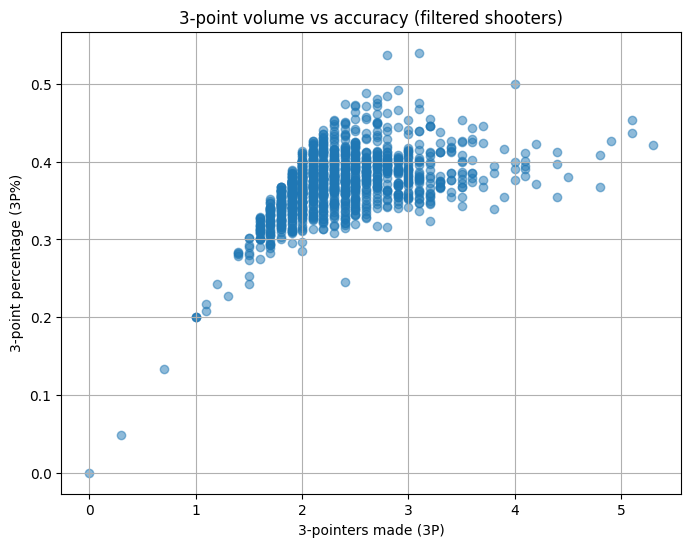

In [39]:
# keep only players who attempted 5 3-points
min_attempts = 5
df = df[df["3PA"] >= min_attempts]

# scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df["3P"], df["3P%"], alpha=0.5)

plt.xlabel("3-pointers made (3P)")
plt.ylabel("3-point percentage (3P%)")
plt.title("3-point volume vs accuracy (filtered shooters)")

plt.grid(True)
plt.show()


In [40]:
#Players who make more 3-pointers have an accuracy of around 30-40%.